In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()  

In [3]:
x_train = x_train.astype('float32') / 255.  
x_test = x_test.astype('float32') / 255.  

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))  
print(x_train.shape)  
print(x_test.shape) 

(60000, 784)
(10000, 784)


# 单层隐含自编器

In [6]:
encoding_dim = 32 

input_img = Input(shape=(784,)) 
encoded = Dense(encoding_dim, activation='relu')(input_img)  
decoded = Dense(784, activation='sigmoid')(encoded) 

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder = Model(inputs=input_img, outputs=decoded)  
encoder = Model(inputs=input_img, outputs=encoded)  
encoded_input = Input(shape=(encoding_dim,))  
decoder_layer = autoencoder.layers[-1]    
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))  
  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') 

In [7]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
               callbacks=[TensorBoard(log_dir='logs')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3600 - val_loss: 0.2715
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.2646 - val_loss: 0.2538
Epoch 3/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2440 - val_loss: 0.2318
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2244 - val_loss: 0.2145
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2092 - val_loss: 0.2011
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1975 - val_loss: 0.1911
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1885 - val_loss: 0.1832
Epoch 8/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1812 - val_loss: 0.1765
Epoch 9/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1751 - val_loss: 0.1709
Epoch

In [8]:
decoded_imgs = autoencoder.predict(x_test)

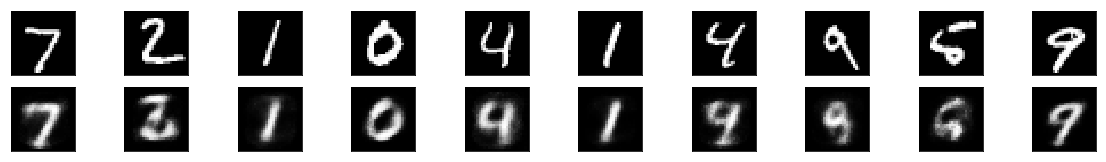

In [9]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)

plt.show()

# 稀疏自编码器，深层自编码器

In [10]:
encoding_dim = 32 

input_img = Input(shape=(784,))  
encoded = Dense(128, activation='relu')(input_img)  
encoded = Dense(64, activation='relu')(encoded)  
decoded_input = Dense(32, activation='relu')(encoded)  
  
decoded = Dense(64, activation='relu')(decoded_input)  
decoded = Dense(128, activation='relu')(decoded)  
decoded = Dense(784, activation='sigmoid')(decoded)  
autoencoder = Model(inputs=input_img, outputs=decoded)  
encoder = Model(inputs=input_img, outputs=decoded_input)  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])  


In [10]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
               callbacks=[TensorBoard(log_dir='logs', histogram_freq=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1649 - val_loss: 0.1613
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1605 - val_loss: 0.1572
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1566 - val_loss: 0.1535
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1529 - val_loss: 0.1498
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1495 - val_loss: 0.1465
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.1464 - val_loss: 0.1435
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1435 - val_loss: 0.1409
Epoch 8/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1409 - val_loss: 0.1384
Epoch 9/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1385 - val_loss: 0.13

In [11]:
decoded_imgs = autoencoder.predict(x_test)

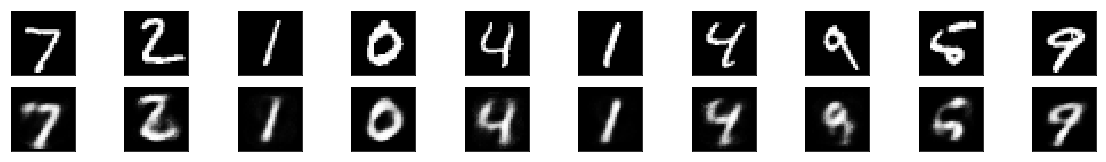

In [12]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)

plt.show()

# 卷积自编码器

In [21]:
x_train_re = x_train.reshape([len(x_train), 28, 28, -1])
x_test_re = x_test.reshape([len(x_test), 28, 28, -1])

In [26]:
input_img = Input(shape=(28, 28, 1))  
  
x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)  
encoded = MaxPooling2D((2, 2), padding='same')(x)  
  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(16, (3, 3), activation='relu')(x)  
x = UpSampling2D((2, 2))(x)  
decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)  
  
autoencoder = Model(inputs=input_img, outputs=decoded)  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  
  
# 打开一个终端并启动TensorBoard，终端中输入 tensorboard --logdir=/autoencoder  
autoencoder.fit(x_train_re, x_train_re, epochs=10, batch_size=256,  
                shuffle=True, validation_data=(x_test_re, x_test_re),  
                callbacks=[TensorBoard(log_dir='logs')])  
  
decoded_imgs = autoencoder.predict(x_test_re) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.2736 - val_loss: 0.1898
Epoch 2/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1808 - val_loss: 0.1701
Epoch 3/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1628 - val_loss: 0.1578
Epoch 4/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1527 - val_loss: 0.1479
Epoch 5/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1463 - val_loss: 0.1461
Epoch 6/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1411 - val_loss: 0.1379
Epoch 7/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1371 - val_loss: 0.1341
Epoch 8/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.1338 - val_loss: 0.1310
Epoch 9/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.1318 - val_loss: 0.1317
Epoch

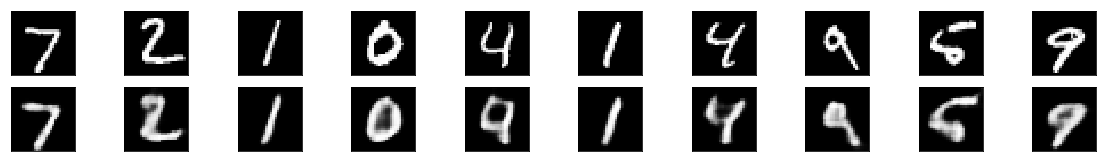

In [27]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)

plt.show()

# 图像去噪

In [33]:
noise_factor = 0.5

In [34]:
x_train_noisy = x_train_re + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_re.shape)   
x_test_noisy = x_test_re + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_re.shape)   
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  
x_test_noisy = np.clip(x_test_noisy, 0., 1.)  

In [36]:
input_img = Input(shape=(28, 28, 1))  
  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(input_img)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)  
encoded = MaxPooling2D((2, 2), padding='same')(x)  
  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)  
x = UpSampling2D((2, 2))(x)  
decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)  
  
autoencoder = Model(inputs=input_img, outputs=decoded)  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  
  
# 打开一个终端并启动TensorBoard，终端中输入 tensorboard --logdir=/autoencoder  
autoencoder.fit(x_train_noisy, x_train_re, epochs=10, batch_size=256,  
                shuffle=True, validation_data=(x_test_noisy, x_test_re),  
                callbacks=[TensorBoard(log_dir='logs', write_graph=False)]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.2187 - val_loss: 0.1423
Epoch 2/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1351 - val_loss: 0.1247
Epoch 3/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1228 - val_loss: 0.1170
Epoch 4/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.1166 - val_loss: 0.1150
Epoch 5/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.1130 - val_loss: 0.1109
Epoch 6/10
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1107 - val_loss: 0.1092
Epoch 7/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.1089 - val_loss: 0.1082
Epoch 8/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1076 - val_loss: 0.1049
Epoch 9/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1064 - val_loss: 0.1

In [37]:
decoded_imgs = autoencoder.predict(x_test_noisy) 

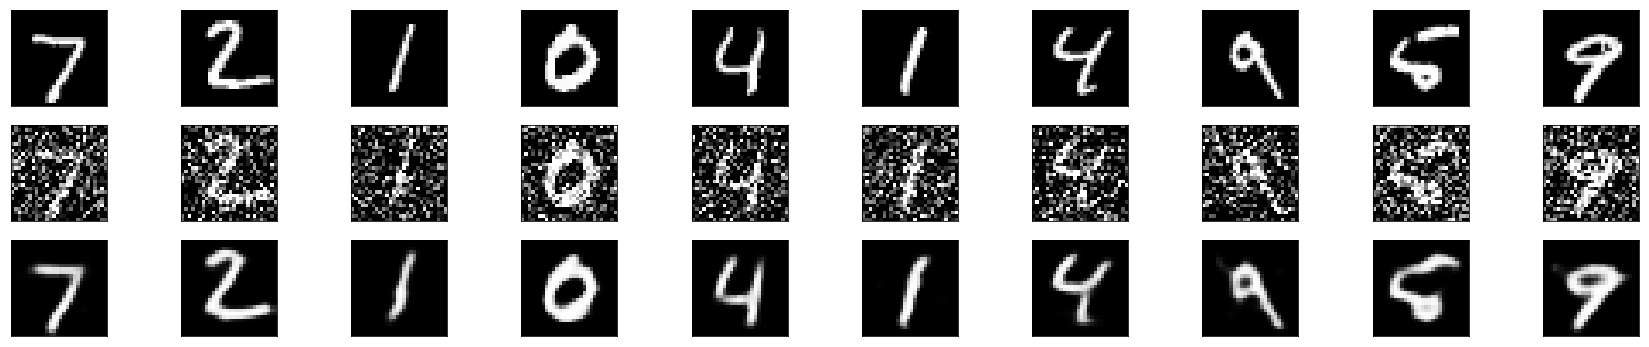

In [38]:
n = 10  
plt.figure(figsize=(30, 6))  
for i in range(n):  
    ax = plt.subplot(3, n, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
      
    ax = plt.subplot(3, n, i + 1 + n)  
    plt.imshow(x_test_noisy[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
  
    ax = plt.subplot(3, n, i + 1 + 2*n)  
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
plt.show() 

In [1]:
1+1

2